In [30]:
#pip install plotly

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py 
from plotly.figure_factory import create_table # for creating nice table

# Dates Visualization

Let's start by having a look at the temporal distribution of our dataset. For that, let's use a scatterplot.

In [33]:
dickens_dates = pd.read_csv("dates\\Charles_Dickens_dates.csv", index_col = 0)

In [34]:
wharton_dates = pd.read_csv("dates\\Edith_Wharton_dates.csv", index_col = 0)

In [35]:
gaskell_dates = pd.read_csv("dates\\Elizabeht_Gaskell_dates.csv", index_col = 0)

In [36]:
twain_dates = pd.read_csv("dates\\Mark_Twain_dates.csv", index_col = 0)

In [63]:
dickens_dates

,Titles,Year
0,A Christmas Carol,1843
1,A Tale of Two Cities,1859
2,Barnaby Rudge,1841
3,Bleak House,1853
4,David Copperfield,1850
5,Dombey and Son,1848
6,Great Expectations,1861
7,Hard Times,1854
8,Little Dorrit,1857
9,Martin Chuzzlewit,1844


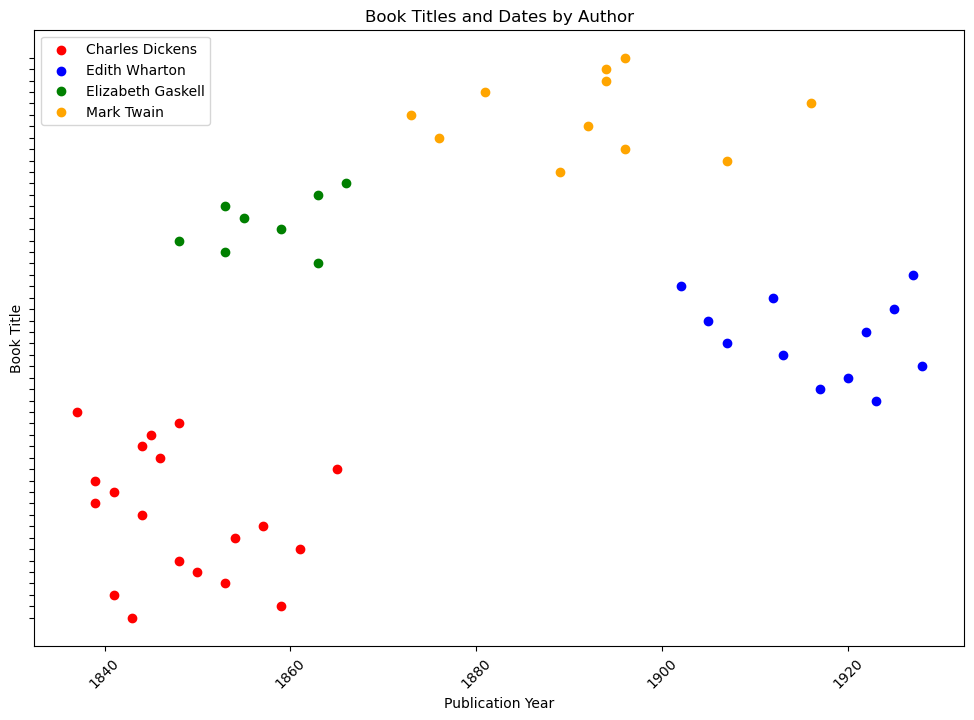

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))  # bigger figure size

# Plot scatter for each dataframe with a different color and label
ax.scatter(dickens_dates['Year'], dickens_dates['Titles'], color='red', label='Charles Dickens')
ax.scatter(wharton_dates['Year'], wharton_dates['Titles'], color='blue', label='Edith Wharton')
ax.scatter(gaskell_dates['Year'], gaskell_dates['Titles'], color='green', label='Elizabeth Gaskell')
ax.scatter(twain_dates['Year'], twain_dates['Titles'], color='orange', label='Mark Twain')

# Add labels and title
ax.set_xlabel('Publication Year')
ax.set_ylabel('Book Title')
ax.set_title('Book Titles and Dates by Author')

# Rotate x-axis labels if needed for clarity
plt.xticks(rotation=45)

# Remove y-axis tick labels (book titles) but keep everything else
ax.tick_params(labelleft=False)

# Add legend to distinguish authors
ax.legend()

# Save the image into a JPG file
plt.savefig('dates_plot.jpg', dpi=300)

plt.show()

# Number of books per author

Let's create a pandas dataframe with the number of books per author using our previous data on book dates

In [38]:
names = ["Charles Dickens", "Edith Wharton", "Elizabeth Gaskell", "Mark Twain"]

In [39]:
titles = [19, 12, 8, 11]

In [40]:
number_of_books = pd.DataFrame({"Author": names, "Books": titles})
number_of_books

,Author,Books
0,Charles Dickens,19
1,Edith Wharton,12
2,Elizabeth Gaskell,8
3,Mark Twain,11


And now let's visualize that using a bar plot!

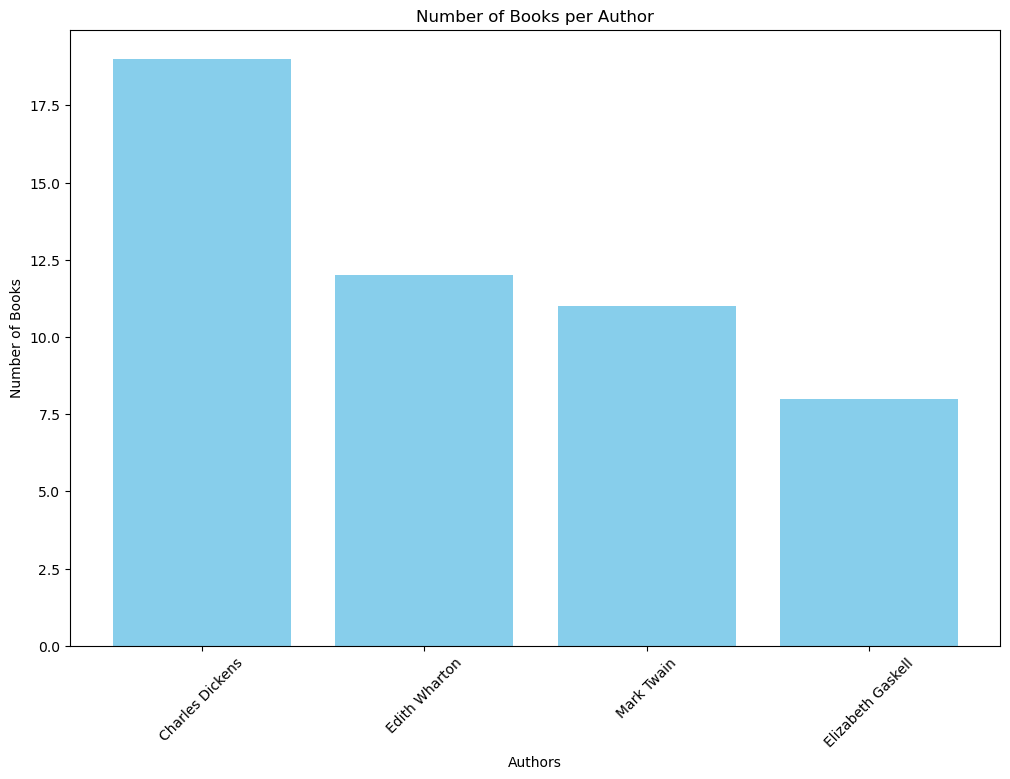

In [41]:
# Sort dataframe by 'number_of_books' descending
df_sorted = number_of_books.sort_values(by='Books', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))  # Make figure bigger if desired

# Create bar plot
ax.bar(df_sorted['Author'], df_sorted['Books'], color='skyblue')

# Add labels and title
ax.set_xlabel('Authors')
ax.set_ylabel('Number of Books')
ax.set_title('Number of Books per Author')

plt.xticks(rotation = 45)  # Rotate x labels for readability

# Save to JPEG file
plt.savefig('books_per_author.jpg', dpi=300)

plt.show()

# Word Count Analytics

Now let's see how long were the books of each author

In [42]:
dickens_word_count =  pd.read_csv("word count\\dickens_number_words.csv", index_col = 0)

In [43]:
wharton_word_count = pd.read_csv("word count\\Gaskell_number_words.csv", index_col = 0)

In [44]:
gaskell_word_count = pd.read_csv("word count\\twain_number_words.csv", index_col = 0)

In [45]:
twain_word_count = pd.read_csv("word count\\wharton_number_words.csv", index_col = 0)

Let's have a look at one dataframe just for exploration purposes

In [46]:
twain_word_count

,Titles,Total Words,Unique Words
0,A Son at the Front,47629,10001
1,Summer,27967,6036
2,The Age of Innocence,55186,9501
3,The Children,44881,9294
4,The Custom of the Country,74714,11100
5,The Fruit of the Tree,75699,10565
6,The Glimpses of the Moon,38507,8086
7,The House of Mirth,60984,11618
8,The Mother's Recompense,35546,7315
9,The Reef,43703,7918


Let's first visualize **total number of words** per author to have a look at how long was each book by each author and have a better sense about the relationship between productivity and book length

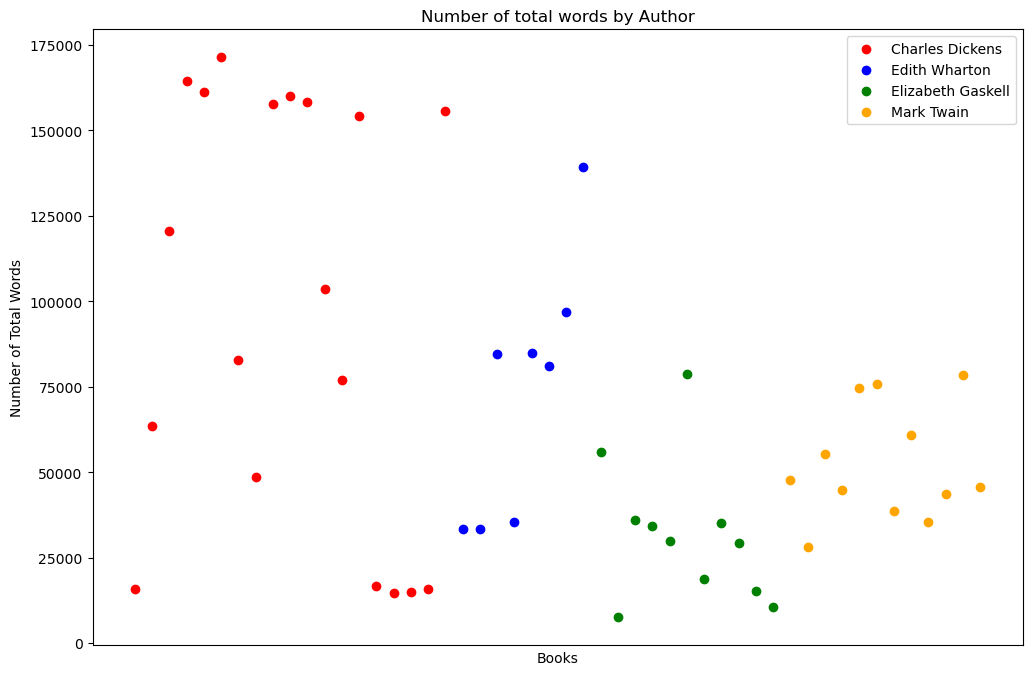

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))  # bigger figure size

ax.scatter(dickens_word_count['Titles'], dickens_word_count['Total Words'], color='red', label='Charles Dickens')
ax.scatter(wharton_word_count['Titles'], wharton_word_count['Total Words'], color='blue', label='Edith Wharton')
ax.scatter(gaskell_word_count['Titles'], gaskell_word_count['Total Words'], color='green', label='Elizabeth Gaskell')
ax.scatter(twain_word_count['Titles'], twain_word_count['Total Words'], color='orange', label='Mark Twain')

ax.set_xlabel('Books')  # This label remains
ax.set_ylabel('Number of Total Words')
ax.set_title('Number of total words by Author')

plt.xticks(rotation=45)

ax.set_xticks([])  # Remove tick marks
ax.set_xticklabels([])  # Remove tick labels

ax.legend()

plt.savefig('total_words_plot.jpg', dpi=300)
plt.show()

So we can see that Charles Dickens is the one that writes the biggest amount of books and also the longest ones, followed by Edith Wharton, and then Mark Twain and Elizabeth Gaskell quite even (so there seems to be a correlation between book length and author productivity (i.e. more books per author also means longer books per author).

And now let's have a look at the **unique number of words** per author, just to have a sense about lexical diversity per author.

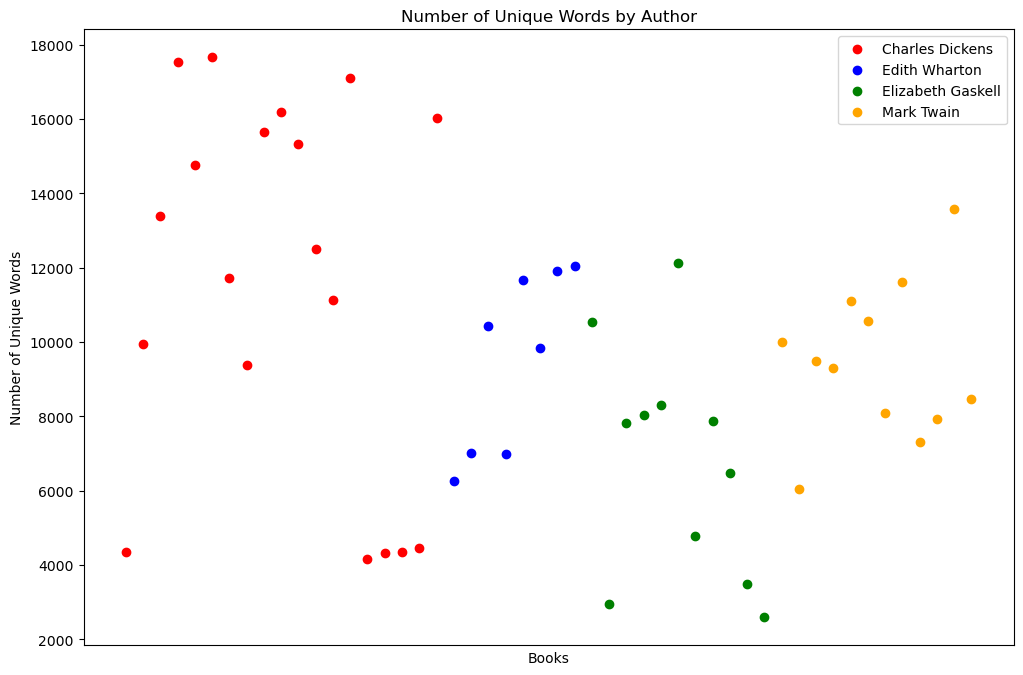

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))  # bigger figure size

ax.scatter(dickens_word_count['Titles'], dickens_word_count['Unique Words'], color='red', label='Charles Dickens')
ax.scatter(wharton_word_count['Titles'], wharton_word_count['Unique Words'], color='blue', label='Edith Wharton')
ax.scatter(gaskell_word_count['Titles'], gaskell_word_count['Unique Words'], color='green', label='Elizabeth Gaskell')
ax.scatter(twain_word_count['Titles'], twain_word_count['Unique Words'], color='orange', label='Mark Twain')

ax.set_xlabel('Books')  # This label remains
ax.set_ylabel('Number of Unique Words')
ax.set_title('Number of Unique Words by Author')

plt.xticks(rotation=45)

ax.set_xticks([])  # Remove tick marks
ax.set_xticklabels([])  # Remove tick labels

ax.legend()

plt.savefig('unique_words_plot.jpg', dpi=300)
plt.show()

# Number of Characters

And now let's have a look at number of characters per book. Social Realism (or Realism), is a literary movement that is characterized by describing reality as thoroughly as possible including characters from all sorts of life and social classes. Let's see if there are indeed tons of characters and how this changes across countries (US) and author's genders (male vs. female).

In [49]:
dickens_characters = pd.read_csv("characters\\dickens_characters.csv", index_col = 0)
wharton_characters = pd.read_csv("characters\\wharton_characters.csv", index_col = 0)
gaskell_characters = pd.read_csv("characters\\gaskell_characters.csv", index_col = 0)
twain_characters = pd.read_csv("characters\\twain_characters.csv", index_col = 0)

In [50]:
dickens_characters

,Titles,Number of Characters
0,A Christmas Carol,68
1,A Tale of Two Cities,160
2,Barnaby Rudge,246
3,Bleak House,444
4,David Copperfield,442
5,Dombey and Son,481
6,Great Expectations,278
7,Hard Times,162
8,Little Dorrit,467
9,Martin Chuzzlewit,476


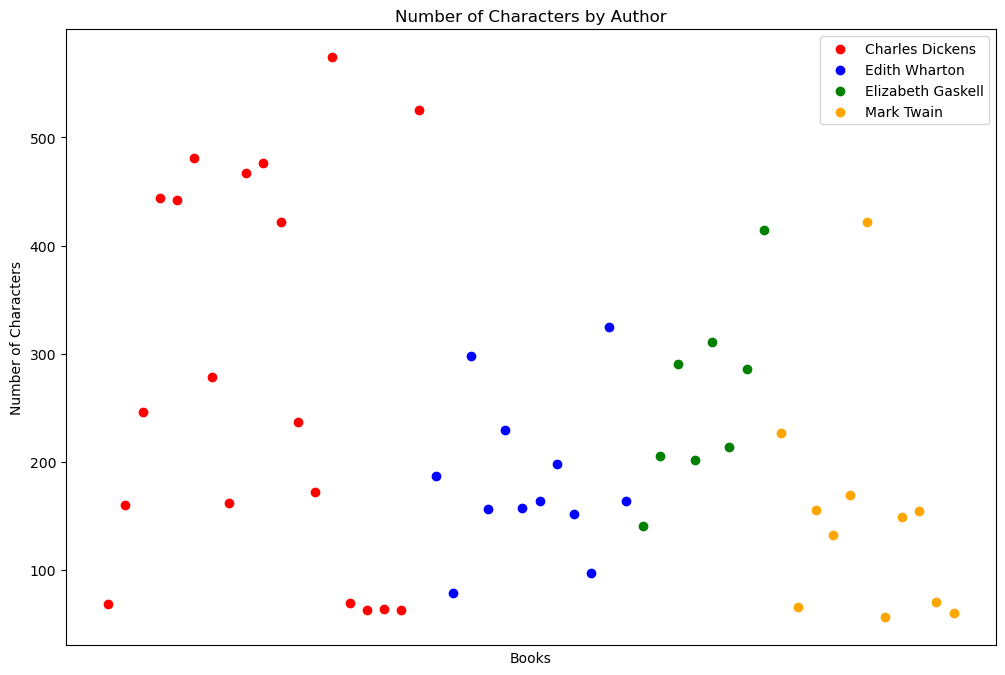

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))  # bigger figure size

ax.scatter(dickens_characters['Titles'], dickens_characters['Number of Characters'], color='red', label='Charles Dickens')
ax.scatter(wharton_characters['Titles'], wharton_characters['Number of Characters'], color='blue', label='Edith Wharton')
ax.scatter(gaskell_characters['Titles'], gaskell_characters['Number of Characters'], color='green', label='Elizabeth Gaskell')
ax.scatter(twain_characters['Titles'], twain_characters['Number of Characters'], color='orange', label='Mark Twain')

ax.set_xlabel('Books')  # This label remains
ax.set_ylabel('Number of Characters')
ax.set_title('Number of Characters by Author')

plt.xticks(rotation=45)

ax.set_xticks([])  # Remove tick marks
ax.set_xticklabels([])  # Remove tick labels

ax.legend()

plt.savefig('characters_plot.jpg', dpi=300)
plt.show()

So we see tons of charcters! The highest is Charles Dickens. Then we see some outliers in Mark Twain and Elizabeth Gaskell, but overall we can see that Gaskell and Wharton are quite close. And then we see that Mark Twain tends to have less characters.

# Male vs. Female Characters

Let's now explore male vs. female characters to see if there is some sort of influence on female authors perhaps talking more about female characters and male authors perhaps talking more about male authors (or not! we will see). 

In [52]:
dickens_gender = pd.read_csv("gender\\dickens_gender_counts.csv", index_col = 0)
wharton_gender = pd.read_csv("gender\\gaskell_gender_counts.csv", index_col = 0)
gaskell_gender = pd.read_csv("gender\\twain_gender_counts.csv", index_col = 0)
twain_gender = pd.read_csv("gender\\wharton_gender_counts.csv", index_col = 0)

In [53]:
dickens_gender

,Titles,male,plural,female,Author
0,A Christmas Carol,92,82,33,Charles Dickens
1,A Tale of Two Cities,360,321,147,Charles Dickens
2,Barnaby Rudge,548,675,200,Charles Dickens
3,Bleak House,671,514,383,Charles Dickens
4,David Copperfield,578,407,431,Charles Dickens
5,Dombey and Son,608,505,419,Charles Dickens
6,Great Expectations,414,212,140,Charles Dickens
7,Hard Times,202,197,190,Charles Dickens
8,Little Dorrit,666,628,479,Charles Dickens
9,Martin Chuzzlewit,700,707,344,Charles Dickens


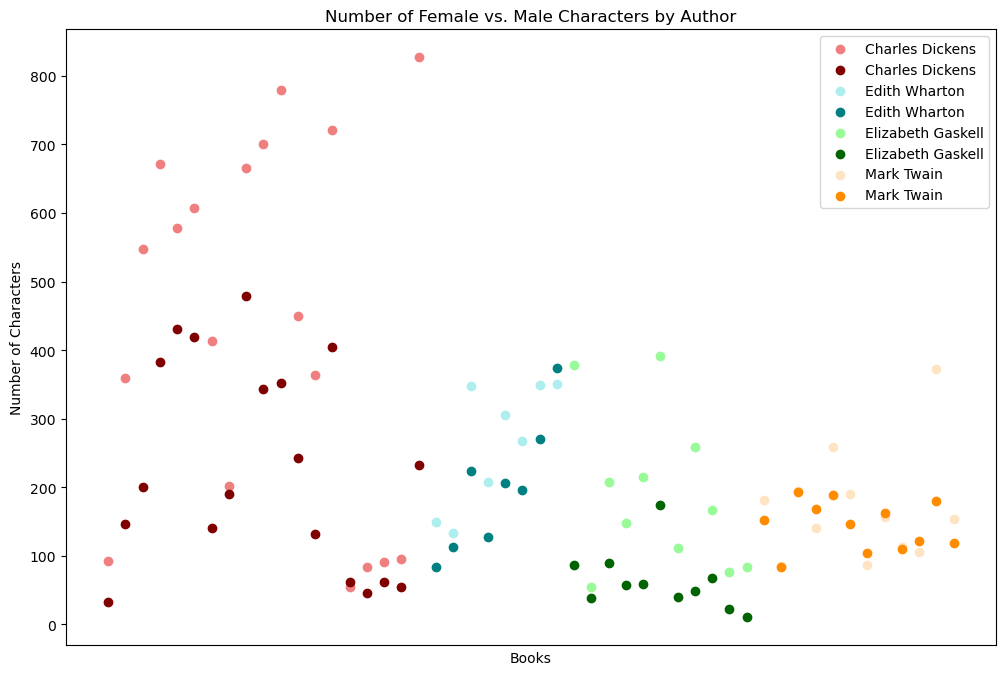

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))  # bigger figure size

ax.scatter(dickens_gender['Titles'], dickens_gender['male'], color='lightcoral', label='Charles Dickens')
ax.scatter(dickens_gender['Titles'], dickens_gender['female'], color= "maroon", label='Charles Dickens')

ax.scatter(wharton_gender['Titles'], wharton_gender['male'], color='paleturquoise', label='Edith Wharton')
ax.scatter(wharton_gender['Titles'], wharton_gender['female'], color='teal', label='Edith Wharton')

ax.scatter(gaskell_gender['Titles'], gaskell_gender['male'], color='palegreen', label='Elizabeth Gaskell')
ax.scatter(gaskell_gender['Titles'], gaskell_gender['female'], color='darkgreen', label='Elizabeth Gaskell')

ax.scatter(twain_gender['Titles'], twain_gender['male'], color='bisque', label='Mark Twain')
ax.scatter(twain_gender['Titles'], twain_gender['female'], color='darkorange', label='Mark Twain')

ax.set_xlabel('Books')  # This label remains
ax.set_ylabel('Number of Characters')
ax.set_title('Number of Female vs. Male Characters by Author')

plt.xticks(rotation=45)

ax.set_xticks([])  # Remove tick marks
ax.set_xticklabels([])  # Remove tick labels

ax.legend()  # call legend without arguments to use provided labels

plt.savefig('male_vs_female_plot.jpg', dpi=300)
plt.show()

So we can see that Charles Dickens evidently uses more male characters than female ones, and Elizabeth Gaskell too but to a certain extend. Edith Wharton and Mark Twain however use almost even numbers of male vs. female characters. 

# Locations

Now let's have a look at GPE (Geopolitical entities) to see how different authors use locations in their novels!

In [55]:
dickens_locations = pd.read_csv("locations\\dickens_locations.csv", index_col = 0)
wharton_locations = pd.read_csv("locations\\wharton_locations.csv", index_col = 0)
gaskell_locations = pd.read_csv("locations\\gaskell_locations.csv", index_col = 0)
twain_locations = pd.read_csv("locations\\twain_locations.csv", index_col = 0)

In [56]:
dickens_locations

,Titles,Number of Locations
0,A Christmas Carol,7
1,A Tale of Two Cities,59
2,Barnaby Rudge,72
3,Bleak House,122
4,David Copperfield,113
5,Dombey and Son,98
6,Great Expectations,75
7,Hard Times,34
8,Little Dorrit,127
9,Martin Chuzzlewit,88


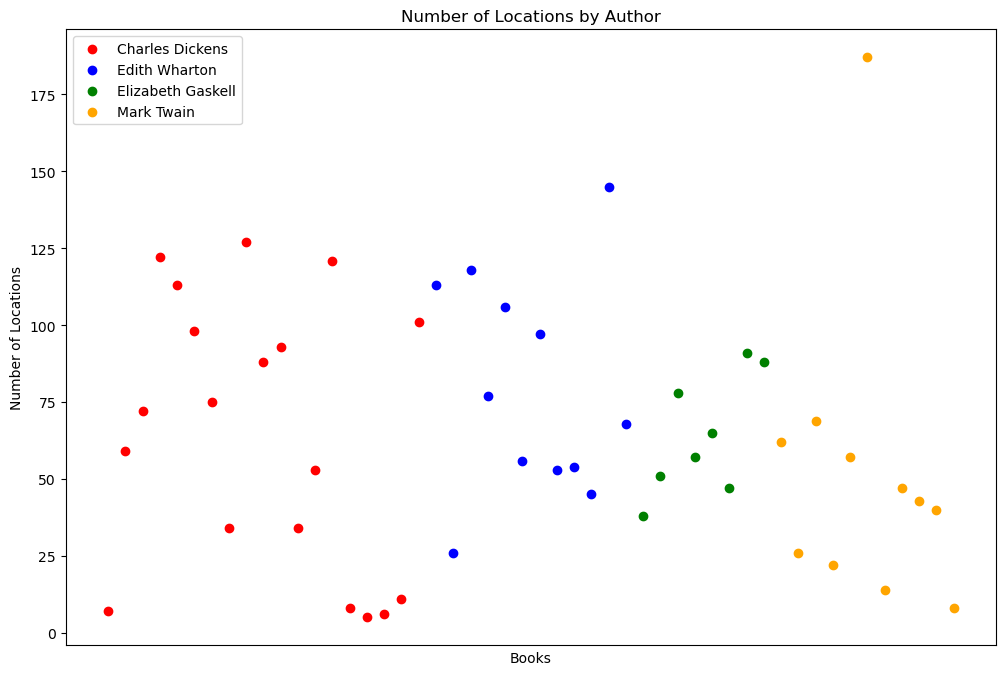

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))  # bigger figure size

ax.scatter(dickens_locations['Titles'], dickens_locations["Number of Locations"], color = 'red', label = 'Charles Dickens')
ax.scatter(wharton_locations["Titles"], wharton_locations['Number of Locations'], color = 'blue', label = 'Edith Wharton')
ax.scatter(gaskell_locations['Titles'], gaskell_locations['Number of Locations'], color = 'green', label = 'Elizabeth Gaskell')
ax.scatter(twain_locations['Titles'], twain_locations['Number of Locations'], color = 'orange', label = 'Mark Twain')

ax.set_xlabel('Books')  # This label remains
ax.set_ylabel('Number of Locations')
ax.set_title('Number of Locations by Author')

plt.xticks(rotation=45)

ax.set_xticks([])  # Remove tick marks
ax.set_xticklabels([])  # Remove tick labels

ax.legend()  # call legend without arguments to use provided labels

plt.savefig('locations_plot.jpg', dpi=300)
plt.show()

That is very interesting! We can see that the number of locations is remarkably homogeneous across authors. Specially, Charles Dickens and Eidth Warton seem to have very smiliar distributions, and Elizabeth Gaskell and Mark Twain too (with the exception of one outlier)

Now let's compare the number of characters with the number of locations per author!

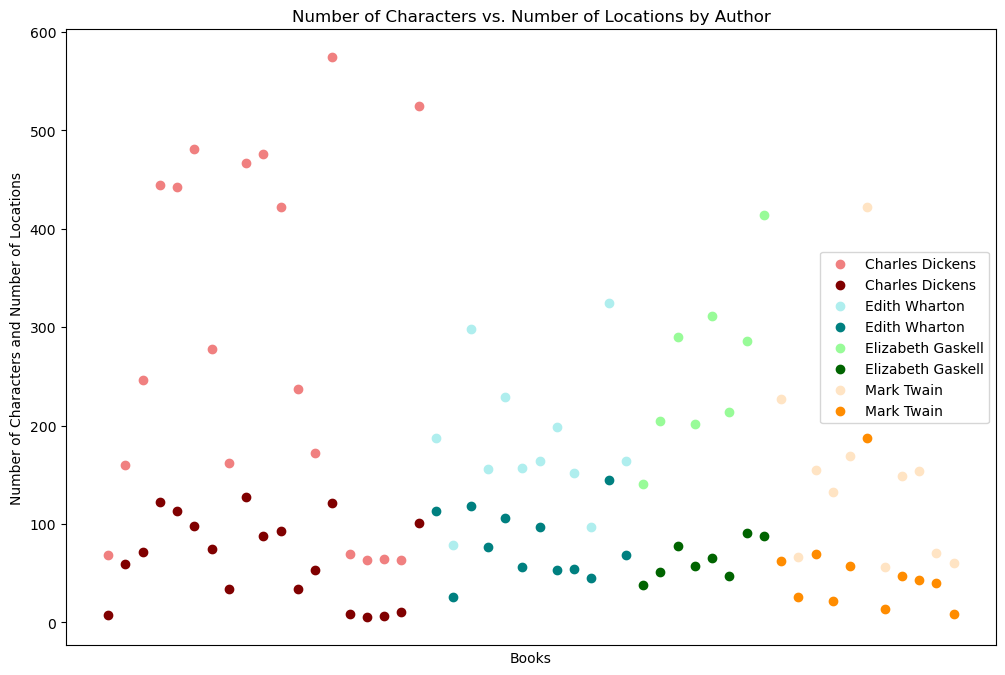

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))  # bigger figure size

ax.scatter(dickens_characters['Titles'], dickens_characters['Number of Characters'], color='lightcoral', label='Charles Dickens')
ax.scatter(dickens_locations['Titles'], dickens_locations['Number of Locations'], color= "maroon", label='Charles Dickens')

ax.scatter(wharton_characters['Titles'], wharton_characters['Number of Characters'], color='paleturquoise', label='Edith Wharton')
ax.scatter(wharton_locations['Titles'], wharton_locations['Number of Locations'], color='teal', label='Edith Wharton')

ax.scatter(gaskell_characters['Titles'], gaskell_characters['Number of Characters'], color='palegreen', label='Elizabeth Gaskell')
ax.scatter(gaskell_locations['Titles'], gaskell_locations['Number of Locations'], color='darkgreen', label='Elizabeth Gaskell')

ax.scatter(twain_characters['Titles'], twain_characters['Number of Characters'], color='bisque', label='Mark Twain')
ax.scatter(twain_locations['Titles'], twain_locations['Number of Locations'], color='darkorange', label='Mark Twain')

ax.set_xlabel('Books')  # This label remains
ax.set_ylabel('Number of Characters and Number of Locations')
ax.set_title('Number of Characters vs. Number of Locations by Author')

plt.xticks(rotation=45)

ax.set_xticks([])  # Remove tick marks
ax.set_xticklabels([])  # Remove tick labels

ax.legend()  # call legend without arguments to use provided labels

plt.savefig('characters_vs_locations_plot.jpg', dpi=300)
plt.show()

So: we can see a very clear pattern in which the number of characters is massively higher than the number of locations. This makes sense taking into account that we are in the Social Realism movement, where authors tend to focus on the local colour of their respectives countries paying more attention to the human side of things (as compared with literary movements like Romanticism where exotism and Travel Literature were more in vogue).

# Geo-Spatial Analysis

Let's now have a look at the Geolocations of the GPEs in the book. Let's remember that GPE are not exact, and as we saw previously, they are subject to some errors (to have them completely error free we need a manual inspection of all of them). But still: it is safe to assume that a large amount of them are correct. So, for orientative purposes, let's have a look!

In [75]:
dickens_coordinates = pd.read_csv("coordinates\\dickens_coordinates.csv", index_col = 0)
wharton_coordinates = pd.read_csv("coordinates\\wharton_coordinates.csv", index_col = 0)
gaskell_coordinates = pd.read_csv("coordinates\\gaskell_coordinates.csv", index_col = 0)
twain_coordinates = pd.read_csv("coordinates\\twain_coordinates.csv", index_col = 0)

In [76]:
dickens_coordinates

,Location,Latitude,Longitude,Titles
0,Bedlam,54.048993,-1.592586,A Christmas Carol
1,Camden Town,51.539253,-0.142757,A Christmas Carol
2,London,51.507446,-0.127765,A Christmas Carol
3,Sheba,31.245744,34.792518,A Christmas Carol
4,Damascus,39.288438,-77.203872,A Christmas Carol
...,...,...,...,...
1222,America,39.783730,-100.445882,The Pickwick Papers
1223,Wulter,NaN,NaN,The Pickwick Papers
1224,Dulwich,51.441879,-0.084324,The Pickwick Papers
1225,Richmond,37.538509,-77.434280,The Pickwick Papers


Let's first have an individual look at each author.

In [77]:
fig = px.scatter_mapbox(dickens_coordinates, lat = "Latitude", lon = "Longitude", 
                        hover_name = "Location", hover_data=["Titles"], 
                        color_discrete_sequence=["red"], zoom=3, height= 1000, width = 1500   
)                     

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [78]:
fig = px.scatter_mapbox(wharton_coordinates, lat = "Latitude", lon = "Longitude", 
                        hover_name = "Location", hover_data=["Titles"], 
                        color_discrete_sequence=["blue"], zoom=3, height= 1000, width = 1500   
)                     

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [82]:
fig = px.scatter_mapbox(gaskell_coordinates, lat = "Latitude", lon = "Longitude", 
                        hover_name = "Location", hover_data=["Titles"], 
                        color_discrete_sequence=["orange"], zoom=3, height= 1000, width = 1500   
)                     

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [83]:
fig = px.scatter_mapbox(twain_coordinates, lat = "Latitude", lon = "Longitude", 
                        hover_name = "Location", hover_data=["Titles"], 
                        color_discrete_sequence=["green"], zoom=3, height= 1000, width = 1500   
)                     

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

And now let's have a look at all of them together!

In [84]:
# Add author column to each dataframe
dickens_coordinates['Author'] = "Dickens"
wharton_coordinates['Author'] = "Wharton"
gaskell_coordinates['Author'] = "Gaskell"
twain_coordinates['Author'] = "Twain"

# Concatenate all dataframes
combined_df = pd.concat([
    dickens_coordinates, 
    wharton_coordinates,
    gaskell_coordinates, 
    twain_coordinates
], ignore_index=True)

# Define color sequence for authors
color_sequence = ["red", "blue", "yellow", "green"]

# Plot with different colors for each author with bigger plot and legend
fig = px.scatter_mapbox(
    combined_df, 
    lat="Latitude", 
    lon="Longitude",
    hover_name="Location",
    hover_data=["Titles", "Author"],
    color="Author",
    color_discrete_sequence=color_sequence,
    zoom=3,
    height=800,
    width=1200
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":0,"l":0,"b":0},
    legend_title_text="Author",
    legend=dict(
        y=0.99,
        yanchor="top",
        x=0.01,
        xanchor="left"
    )
)

fig.show()


So: we can see that there are no substantial differences between all authors! The majority of them show a clear concentration of locations in Europe and North America (and specially, the east coast and the UK), but they reflect the 19th century imperialism of both the US and the UK main commerce and travel routes. We dont see any particular differences in terms of gender or country of origin of our selected authors!

# Summarizing

We can see that, overall, our metadata analysis does not show any significant differences between female vs. male authors. That, however, doesn´t mean that those differences are not there. To have a better understanding about character agency in our novels (male vs. female, UK vs. USA) we should need to implement Network Analysis both in terms of character relations and in terms of locations to have a better understanding of hubs (both in terms of character agency and in terms of location agency!).